In [1]:
# Import Required Libraries and Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 10) 
filepath = "../Datasets/Soil Health.csv"
df = pd.read_csv(filepath)
display(df)

,Location,Soil pH,Soil Moisture (%),Soil Organic Matter (%),Soil Nitrogen Content (mg/kg),Soil Phosphorus Content (mg/kg),Soil Potassium Content (mg/kg),Average Daily Temperature (⁰C),Total Rainfall (mm),Crop Yield (tons/ha)
0,West,5.87,38.00,3.19,2407.00,31.60,480.00,26.70,1200.00,8.72
1,Central,6.42,43.90,5.17,1702.00,78.10,293.00,23.40,822.00,7.60
2,East,7.53,44.30,3.93,1545.00,61.00,357.00,20.10,601.00,6.53
3,Central,5.71,26.20,4.78,1541.00,34.20,383.00,20.60,1200.00,6.53
4,Central,7.17,45.50,3.41,1371.00,57.20,125.00,27.20,954.00,6.92
...,...,...,...,...,...,...,...,...,...,...
95,East,6.58,20.00,3.98,1371.00,37.10,320.00,21.10,1147.00,5.80
96,Central,7.20,11.60,4.30,300.00,36.90,240.00,24.90,1108.00,3.62
97,South,6.61,22.10,2.79,1366.00,5.80,430.00,26.30,1009.00,5.52
98,South,6.08,31.50,1.84,1241.00,52.00,237.00,24.70,400.00,4.48


C:\Users\user\AppData\Local\Temp\ipykernel_11808\1682114414.py:48: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from font(s) Maiandra GD.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from font(s) Maiandra GD.
  fig.canvas.print_figure(bytes_io, **kw)


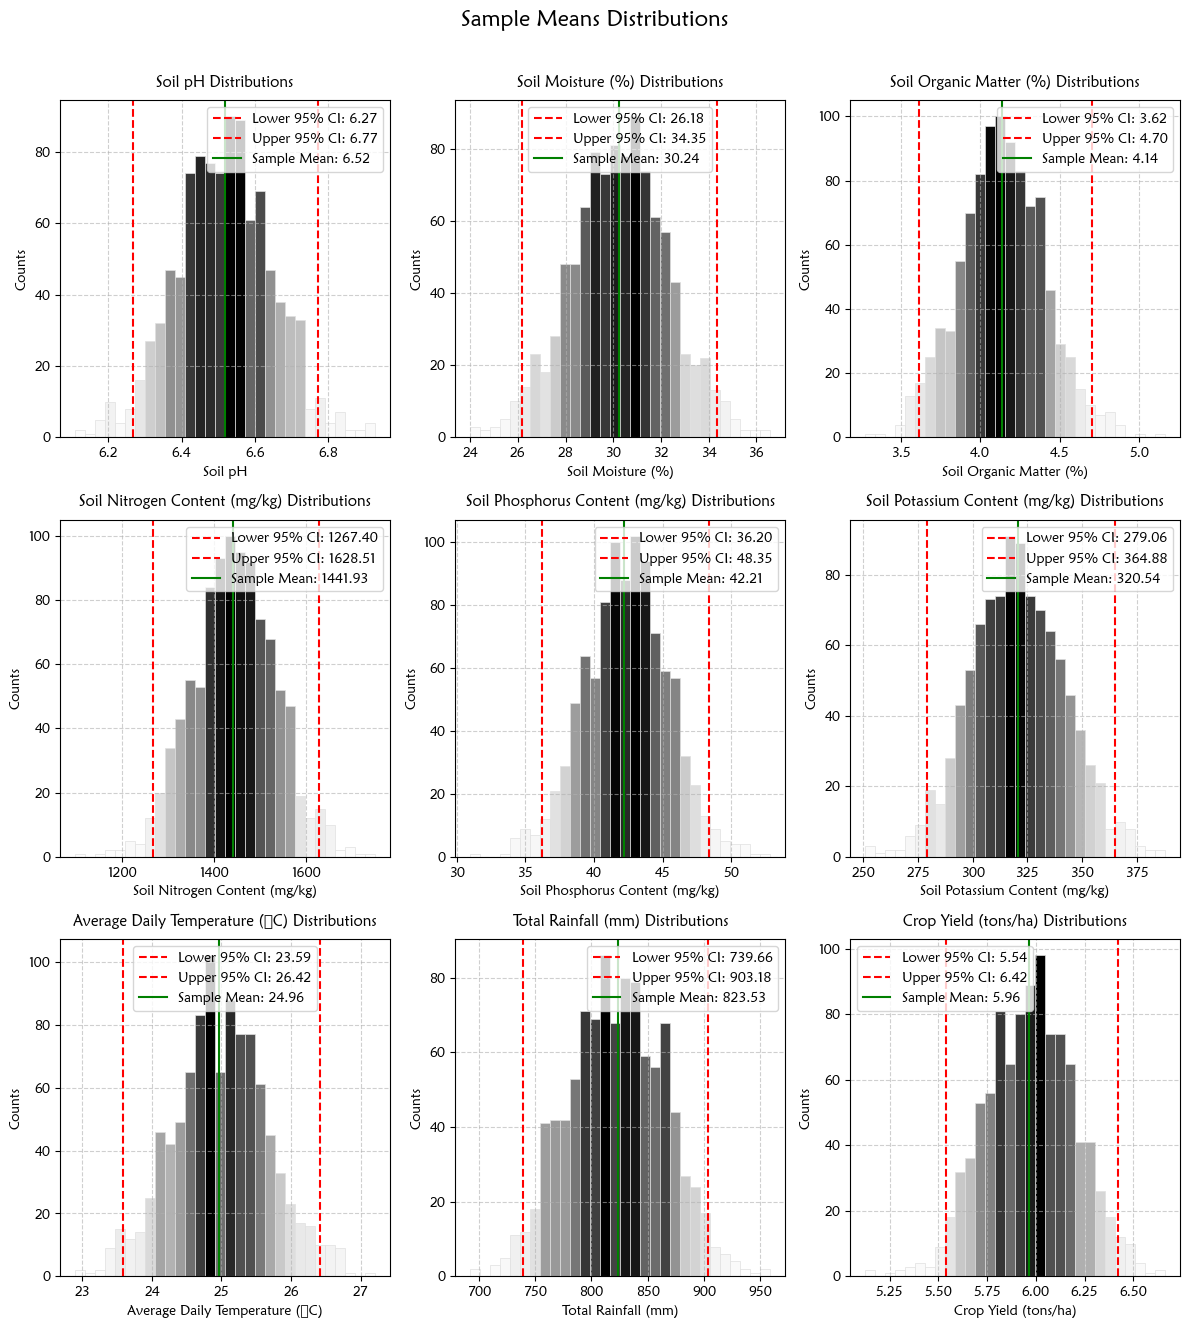

In [3]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return np.array(sample_means)


def compute_confidence_interval(bootstrap_means, confidence_level=95):     # - For 95% CI:
    lower_percentile = (100 - confidence_level) / 2                        #   - Lower bound = 2.5th percentile
    upper_percentile = 100 - lower_percentile                              #    - Upper bound = 97.5th percentile
    ci_lower = np.percentile(bootstrap_means, lower_percentile)            # - This gives us the interval in which the true average yield is likely to lie.
    ci_upper = np.percentile(bootstrap_means, upper_percentile)
    return ci_lower, ci_upper


def plot_histoplot(data, numeric_cols=None):
    if numeric_cols is None: numeric_cols = data.select_dtypes(include='number').columns.tolist()    
        
    num_variables = len(numeric_cols)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5* rows))
    plt.rcParams.update({'font.family': 'Maiandra GD', 'font.style': 'normal', 'font.size': 10 })
    fig.suptitle("Sample Means Distributions", fontsize=16, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(numeric_cols):
        ax = axes[idx]
        bootstrap_means = bootstrapping(data, column)
        sample_mean = np.mean(data[column])
        ci_lower, ci_upper = compute_confidence_interval(bootstrap_means, confidence_level=95)
        n, bins, patches = ax.hist(bootstrap_means, bins=30, edgecolor='#e0e0e0', linewidth=0.5, alpha=1)
        
        for i in range(len(patches)): patches[i].set_facecolor(plt.cm.Grays(n[i] / max(n)))
        axes[idx].axvline(ci_lower, color='red', linestyle='--', label=f'Lower 95% CI: {ci_lower:.2f}')
        axes[idx].axvline(ci_upper, color='red', linestyle='--', label=f'Upper 95% CI: {ci_upper:.2f}')
        axes[idx].axvline(sample_mean, color='green', linestyle='-', label=f'Sample Mean: {sample_mean:.2f}')
  
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Counts')
        axes[idx].legend(frameon=True)
        
    for idx in range(num_variables, len(axes)):fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    return fig
    
fig = plot_histoplot(df)
#fig.savefig(f'../Outputs/Variables Distribution.png')

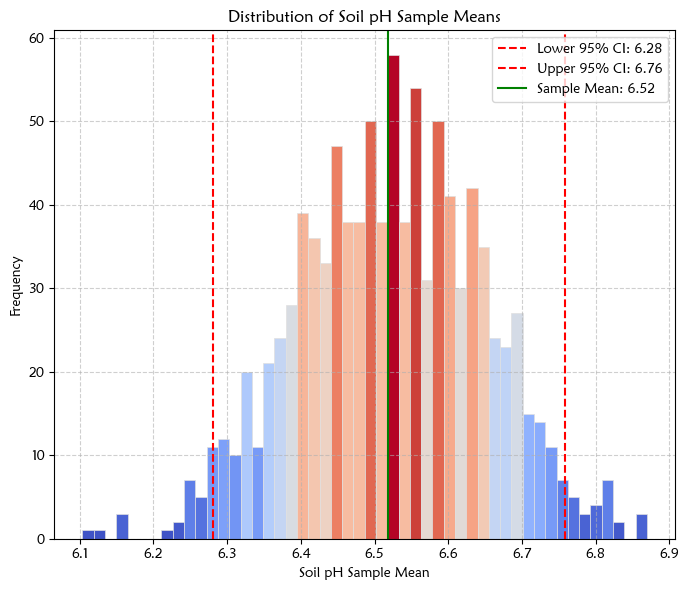

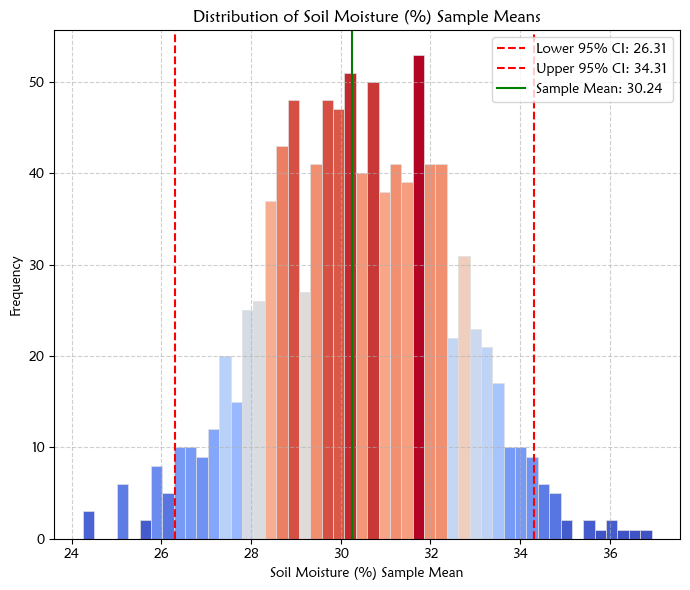

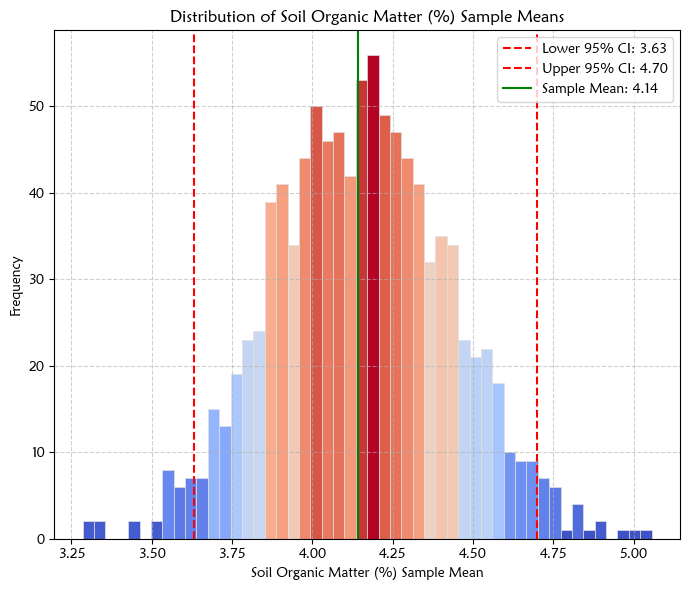

In [4]:
def plot_bootstrap_distribution(bootstrap_means, ci_lower, ci_upper, sample_mean, column=None):
    fig, ax = plt.subplots(figsize=(7, 6))
    n, bins, patches = ax.hist(bootstrap_means, bins=50, edgecolor='#e0e0e0', linewidth=0.5, alpha=1)
    plt.rcParams.update({'font.family': 'Maiandra GD', 'font.style': 'normal', 'font.size': 10 })
    for i in range(len(patches)): patches[i].set_facecolor(plt.cm.coolwarm(n[i] / max(n)))
        
    plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower 95% CI: {ci_lower:.2f}')
    plt.axvline(ci_upper, color='red', linestyle='--', label=f'Upper 95% CI: {ci_upper:.2f}')
    plt.axvline(sample_mean, color='green', linestyle='-', label=f'Sample Mean: {sample_mean:.2f}')
    
    if column: plt.title(f'Distribution of {column} Sample Means', fontfamily='Maiandra GD')
    else: plt.title('Distribution of Sample Means', fontfamily='Capitalist')
    if column: plt.xlabel(f'{column} Sample Mean')
        
    else: plt.xlabel('Sample Mean')
    plt.grid(linestyle='--', alpha=0.6)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return fig

    
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns[:3]):  # I choose only 3 variables just for showcase 
    bootstrap_means = bootstrapping(df, column)                                 # Step 2: Bootstrap resampling
    ci_lower, ci_upper = compute_confidence_interval(bootstrap_means)           # Step 3: Compute 95% confidence interval
    sample_mean = np.mean(df[column])                                           # Step 4: Calculate the actual sample mean
    fig = plot_bootstrap_distribution(
        bootstrap_means = bootstrap_means, 
        ci_lower = ci_lower, 
        ci_upper = ci_upper, 
        sample_mean = sample_mean,
        column = column)
    #fig.savefig(f'../Outputs/00000-00{i} HISTOGRAM.png')
    